<a href="https://colab.research.google.com/github/IhsanRidhoAsmoro/MachineLearningTask/blob/main/tugas9/NN_on_diabetes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/diabetes-dataset.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Memisahkan fitur dan target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membangun model Neural Network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Mengevaluasi model pada data uji
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Epoch 1/50
40/40 [==============================] - 2s 12ms/step - loss: 0.2090 - val_loss: 0.1847
Epoch 2/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1585 - val_loss: 0.1681
Epoch 3/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1445 - val_loss: 0.1560
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.1340 - val_loss: 0.1557
Epoch 5/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1294 - val_loss: 0.1495
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1248 - val_loss: 0.1501
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1214 - val_loss: 0.1468
Epoch 8/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1181 - val_loss: 0.1484
Epoch 9/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1137 - val_loss: 0.1453
Epoch 10/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1112 - val_loss: 0.1411
Epoch 11/50
40/40 

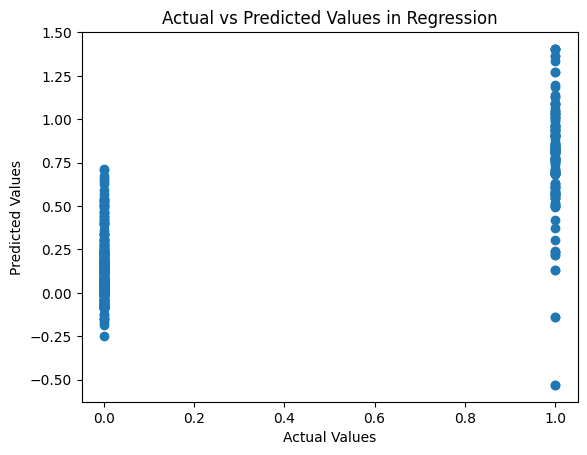

In [7]:
import matplotlib.pyplot as plt

# Plot hasil regresi
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values in Regression')
plt.show()

In [8]:
# Mengevaluasi model pada data uji
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Menghitung R-squared
r_squared = 1 - (mse / np.var(y_test))
print(f'R-squared: {r_squared}')


13/13 [==============================] - 0s 4ms/step
Mean Squared Error: 0.08851918916110742
R-squared: 0.6191801708537767
